In [1]:
library(gplots)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




# load Supplementary table 4

In [2]:
df <- read.csv("./clinical_association/Supplementary Table 4.csv",header = TRUE, sep =",", stringsAsFactors=T)

In [3]:
df

GID,Family_ID,Gene,Hit,MTOR_pathway,MAPK_pathway,WNT_signaling,NFkB_pathway,Cytoskeleton,Synaptic_function,⋯,Nu.cell_size_ratio,Seizure_onset,Seizure_mean_duration,Seizure_frequency,Dysplastic_neuron,HME,TypeI,TypeIIA,TypeIIB,TypeIII
<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
HME-1562,1562,CELSR1;PIK3CA,2,1,0,1,0,0,0,⋯,NA,14,NA,7.5000,NA,1,NA,NA,NA,NA
HME-1566,1566,TRIP12,1,0,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,1,NA,NA,NA,NA
HME-1573,1573,PIK3CA,1,1,0,0,0,0,0,⋯,NA,2,300.0,1.5000,1,1,0,1,0,0
HME-1590,1590,PIK3CA,1,1,0,0,0,0,0,⋯,NA,5,30.0,NA,1,1,0,1,0,0
HME-1908,1908,PIK3CA,1,1,0,0,0,0,0,⋯,NA,NA,NA,NA,NA,1,NA,NA,NA,NA
HME-1917,1917,MAPK9,1,0,1,0,0,0,0,⋯,NA,180,NA,20.0000,0,1,1,0,0,0
FCD-2258,2258,CANT1,1,0,0,0,1,0,0,⋯,0.5032207,240,390.0,1.0000,0,0,1,0,0,0
FCD-2259,2259,CSMD3,1,0,0,0,0,0,0,⋯,NA,NA,NA,NA,1,0,0,0,1,0
FCD-2264,2264,NRDC,1,0,0,0,0,0,0,⋯,NA,NA,NA,NA,0,0,1,0,0,0


# Figure 4a

In [5]:
colname<-colnames(df)

In [18]:
gene_group<-colname[c(5:6,8,10:18,26)]
phenotype<-colname[c(50:54)]
gene_group
phenotype

[1] "MTOR_pathway"       "MAPK_pathway"       "NFkB_pathway"      
 [4] "Synaptic_function"  "Neurite"            "Glycosylation"     
 [7] "Neuronal_migration" "Calcium_dynamics"   "Immune"            
[10] "Gene_expression"    "Ubiquitination"     "Lysosome"          
[13] "COSMIC"

[1] "HME"     "TypeI"   "TypeIIA" "TypeIIB" "TypeIII"

In [19]:
pearson_phi <-matrix(ncol=length(phenotype),nrow=length(gene_group))
pearson_pval <-matrix(ncol=length(phenotype),nrow=length(gene_group))
a<-cbind(df[,gene_group[2]],df[,phenotype[2]])
b<-cor.test(a[,1], a[,2])

In [20]:
for (i in 1:length(gene_group)) {
    for (j in 1:length(phenotype)) {
        a<-na.omit(cbind(df[,gene_group[i]], df[,phenotype[j]]))
        pearson.test<-cor.test(a[,1], a[,2])
        pearson_phi[i,j]<- pearson.test$estimate
        pearson_pval[i,j]<- pearson.test$p.value
    }
}

In [23]:
colnames(pearson_phi)<-phenotype
rownames(pearson_phi)<-gene_group
colnames(pearson_pval)<-phenotype
rownames(pearson_pval)<-gene_group

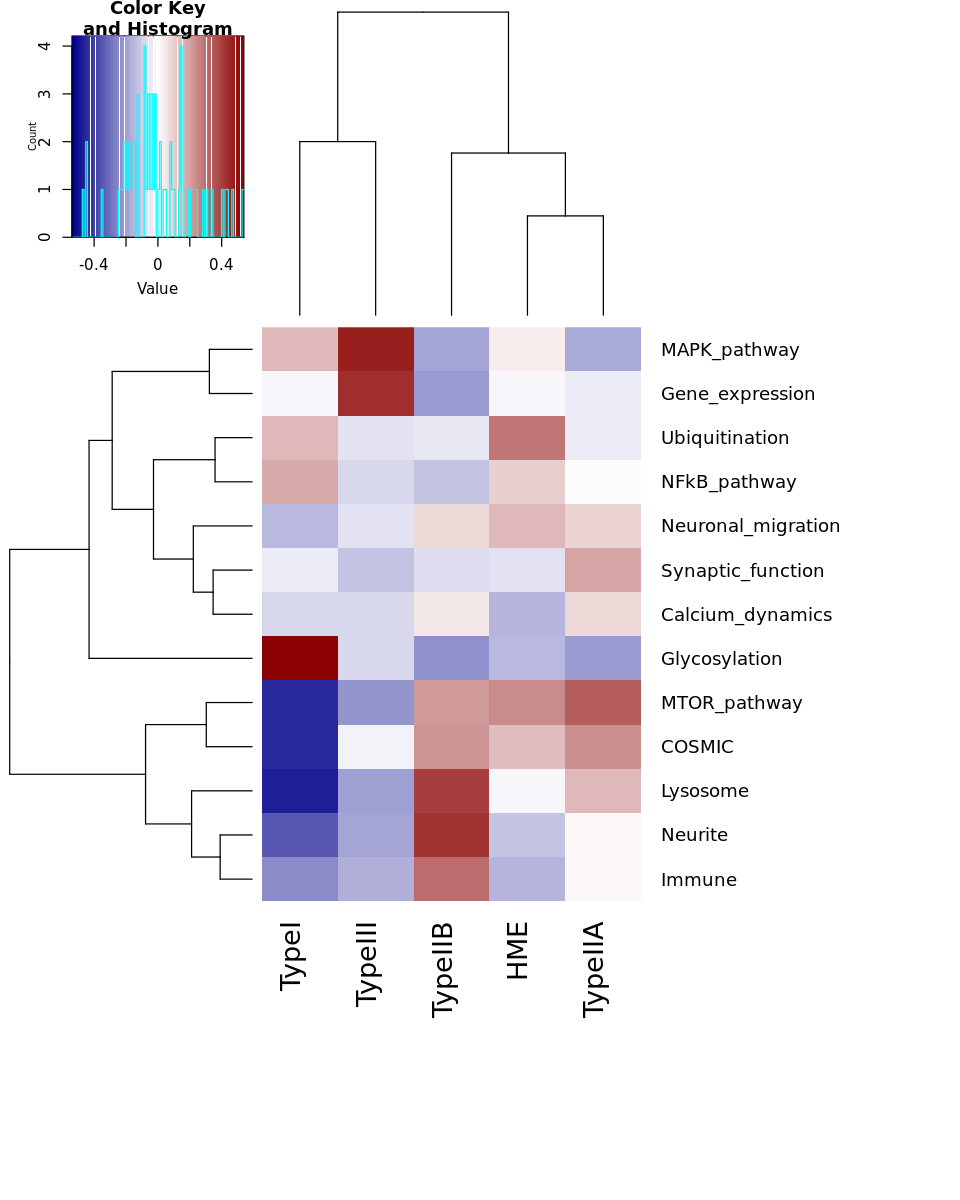

In [24]:
options(repr.plot.width=8, repr.plot.height=10)
heatmap.2(pearson_phi,scale="none",trace="none",col = colorRampPalette(c("darkblue","white","darkred"))(100),
          margins=c(15,16) 
         )

In [25]:
pdf(file = "./clinical_association/Figure4a.pdf", width= 10, height=10)  # The directory you want to save the file in
options(repr.plot.width=8, repr.plot.height=10)
heatmap.2(pearson_phi,scale="none",trace="none",col = colorRampPalette(c("darkblue","white","darkred"))(100),
          margins=c(15,16) 
         )
dev.off()

png 
  2

# Figure 4b

In [6]:
gene_group<-colname[c(5:6,8,10:18,26,50:54)]
phenotype<-colname[c(30:35,37,40,46:48)]
gene_group
phenotype

[1] "MTOR_pathway"       "MAPK_pathway"       "NFkB_pathway"      
 [4] "Synaptic_function"  "Neurite"            "Glycosylation"     
 [7] "Neuronal_migration" "Calcium_dynamics"   "Immune"            
[10] "Gene_expression"    "Ubiquitination"     "Lysosome"          
[13] "COSMIC"             "HME"                "TypeI"             
[16] "TypeIIA"            "TypeIIB"            "TypeIII"

[1] "Sleep_seizures"                         
 [2] "History_of_infantile_spasm"             
 [3] "History_of_focal_seizure"               
 [4] "Abnormal_neurological_examination"      
 [5] "Abnormal_neuropsychological_examination"
 [6] "PET_hypometabolism"                     
 [7] "Developmental_delay_binary"             
 [8] "Engel_scoreI_II"                        
 [9] "Seizure_onset"                          
[10] "Seizure_mean_duration"                  
[11] "Seizure_frequency"

In [7]:
pearson_phi <-matrix(ncol=length(phenotype),nrow=length(gene_group))
pearson_pval <-matrix(ncol=length(phenotype),nrow=length(gene_group))

In [9]:
a<-cbind(df[,gene_group[2]],df[,phenotype[2]])
b<-cor.test(a[,1], a[,2])

In [11]:
for (i in 1:length(gene_group)) {
    for (j in 1:length(phenotype)) {
        a<-na.omit(cbind(df[,gene_group[i]], df[,phenotype[j]]))
        pearson.test<-cor.test(a[,1], a[,2])
        pearson_phi[i,j]<- pearson.test$estimate
        pearson_pval[i,j]<- pearson.test$p.value
    }
}

In [13]:
colnames(pearson_phi)<-phenotype
rownames(pearson_phi)<-gene_group
colnames(pearson_pval)<-phenotype
rownames(pearson_pval)<-gene_group

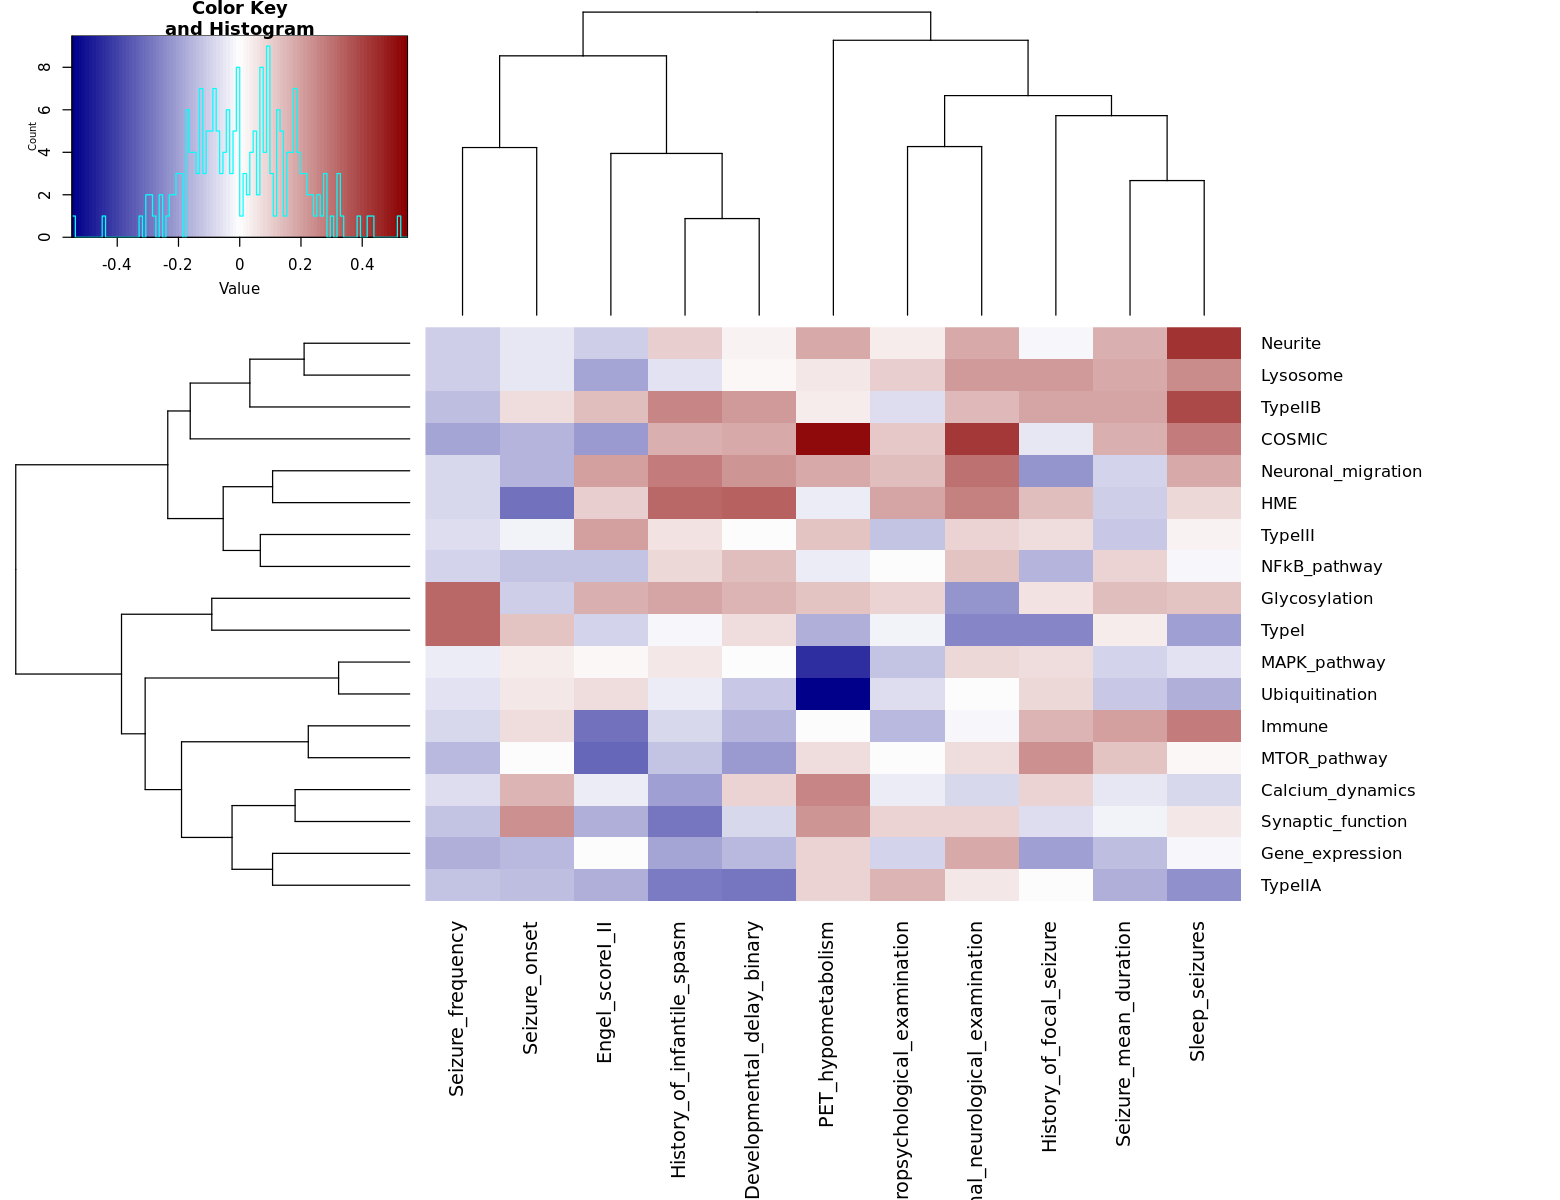

In [14]:
options(repr.plot.width=13, repr.plot.height=10)
heatmap.2(pearson_phi,scale="none",trace="none",col = colorRampPalette(c("darkblue","white","darkred"))(100),margins=c(15,16))

In [15]:
pdf(file = "./clinical_association/Figure4b.pdf", width= 10, height=10)  # The directory you want to save the file in
options(repr.plot.width=15, repr.plot.height=10)
heatmap.2(pearson_phi,scale="none",trace="none",col = colorRampPalette(c("darkblue","white","darkred"))(100),margins=c(15,16))
dev.off()

png 
  2

In [16]:
pearson_pval

,Sleep_seizures,History_of_infantile_spasm,History_of_focal_seizure,Abnormal_neurological_examination,Abnormal_neuropsychological_examination,PET_hypometabolism,Developmental_delay_binary,Engel_scoreI_II,Seizure_onset,Seizure_mean_duration,Seizure_frequency
MTOR_pathway,0.936903150,0.41636589,0.11377126,0.649686433,0.9547858,0.729212200,0.16570814,0.03826161,0.97755656,0.4262621,0.34275444
MAPK_pathway,0.716549785,0.72878970,0.64102210,0.587023842,0.4188576,0.019578598,0.97699763,0.93097052,0.77563711,0.5897433,0.80349559
NFkB_pathway,0.904847883,0.61020809,0.30227442,0.424440091,0.9785337,0.853644516,0.38253244,0.44256622,0.39216952,0.5810441,0.54696506
Synaptic_function,0.776297932,0.05305053,0.64102210,0.534547740,0.5503849,0.249673867,0.57721798,0.29145853,0.11328716,0.8646831,0.41672685
Neurite,0.005967884,0.50589028,0.93334198,0.244453773,0.8112262,0.352425800,0.87291082,0.50645429,0.76090051,0.2937876,0.49969436
Glycosylation,0.445737225,0.21612389,0.70685232,0.145502235,0.5344026,0.537236084,0.32586787,0.29145853,0.47811232,0.4169654,0.03899635
Neuronal_migration,0.272630912,0.07009512,0.12927215,0.041287093,0.3663717,0.371951762,0.15151653,0.18900166,0.27658071,0.5583114,0.60452712
Calcium_dynamics,0.597463340,0.18600818,0.53696268,0.607855906,0.8159502,0.184642691,0.53515575,0.83623588,0.29162699,0.7684726,0.67718145
Immune,0.078220209,0.58643606,0.29022187,0.930362207,0.3469638,1.000000000,0.30126641,0.05479097,0.65787980,0.2154895,0.58459882
Gene_expression,0.932736250,0.21050745,0.17616624,0.244453773,0.5364065,0.624372668,0.32826029,1.00000000,0.31665499,0.3925424,0.28034479
